# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
cities = pd.DataFrame(cities)
# Print the city count to confirm sufficient count
len(cities)
temp= []
humidity = []
cloud = []
wind = []
name=[]
country=[]
date =[]
lat=[]
lon=[]
# cities
index = 0
set_number = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?"
print('Beginning Data Retrieval')
print('---------------------------------')
for city in cities[0]:
    query_url = url + "appid=" + api_key + "&q=" + city +"&units=imperial"
    weather_json = requests.get(query_url).json()
    try:
        print(f'Processing Record {index +1} of Set {set_number} | {weather_json["name"]}')
    except KeyError:
        print('City not found. Skipping...')
    try:
        temp.append(weather_json['main']['temp_max'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        humidity.append(weather_json['main']['humidity'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        cloud.append(weather_json['clouds']['all'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        wind.append(weather_json['wind']['speed'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        name.append(weather_json['name'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        country.append(weather_json['sys']['country'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        date.append(weather_json['dt'])
    except KeyError:
        pass
        print('City not found. Skipping...')    
    try:
        lat.append(weather_json['coord']['lat'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        lon.append(weather_json['coord']['lon'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    index=index+1
    if index == 50:
        index = 0
        set_number=set_number+1

Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | Naze
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 3 of Set 1 | Manoel Urbano
Processing Record 4 of Set 1 | Yerbogachen
Processing Record 5 of Set 1 | Kirakira
Processing Record 6 of Set 1 | Ketchikan
Processing Record 7 of Set 1 | Gornopravdinsk
Processing Record 8 of Set 1 | Katsuura
Processing Record 9 of Set 1 | Thompson
Processing Record 10 of Set 1 | Punta Arenas
Processing Record 11 of Set 1 | Puerto Baquerizo Moreno
Processing Record 12 of Set 1 | Saint Anthony
Processing Record 13 of Set 1 | Vaini
Processing Record 14 of Set 1 | Cidreira
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

Processing Record 29 of Set 3 | Avarua
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 31 of Set 3 | Verkhoyansk
Processing Record 32 of Set 3 | Sao Filipe
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 34 of Set 3 | Basco
Processing Record 35 of Set 3 | Vangaindrano
Processing Record 36 of Set 3 | Galle
Processing Record 37 of Set 3 | Ostrovnoy
Processing Record 38 of Set 3 | Bulgan
Processing Record 39 of Set 3 | Ambatolampy
Processing Record 40 of Set 3 | Saryg-Sep
Processing Record 41 of Se

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 6 | Mpraeso
Processing Record 7 of Set 6 | Yumen
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 6 | Aleksandrov Gay
Processing Record 10 of Set 6 | Lac du Bonnet
Processing Record 11 of Set 6 | Bom Jesus da Lapa
Processing Record 12 of Set 6 | Laguna
Processing Record 13 of Set 6 | Carnarvon
Processing Record 14 of Set 6 | Chokurdakh
Processing Record 15 of Set 6 | Teahupoo
Processing Record 16 of Set 6 | Srednekolymsk
Processing

Processing Record 24 of Set 8 | Xingcheng
Processing Record 25 of Set 8 | Dingle
Processing Record 26 of Set 8 | Acajutla
Processing Record 27 of Set 8 | Geraldton
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 29 of Set 8 | Samaipata
Processing Record 30 of Set 8 | Tasiilaq
Processing Record 31 of Set 8 | Caucaia
Processing Record 32 of Set 8 | Gat
Processing Record 33 of Set 8 | Pacifica
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 35 of Set 8 | Ilulissat
Processing Record 36 of Set 8 | Ca

Processing Record 44 of Set 10 | Ouadda
Processing Record 45 of Set 10 | Puerto Quijarro
Processing Record 46 of Set 10 | Saint-Georges
Processing Record 47 of Set 10 | Caibarien
Processing Record 48 of Set 10 | Maceio
Processing Record 49 of Set 10 | Lishu
Processing Record 50 of Set 10 | Okha
Processing Record 1 of Set 11 | Puerto Leguizamo
Processing Record 2 of Set 11 | Zhangye
Processing Record 3 of Set 11 | Sola
Processing Record 4 of Set 11 | Cap Malheureux
Processing Record 5 of Set 11 | Lovington
Processing Record 6 of Set 11 | Amahai
Processing Record 7 of Set 11 | Pangkalanbuun
Processing Record 8 of Set 11 | Termez
Processing Record 9 of Set 11 | Sisimiut
Processing Record 10 of Set 11 | Jinan
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Proce

In [26]:
data = zip(country, date, cloud, humidity, lat, lon, temp, wind)
data= pd.DataFrame(data, columns=['Country', 'Date', 'Cloudiness', 'Humidity', 'Latitude', 'Longitude', 'Max Temp (F)', 'Wind Speed (mph)'])
data.head()

,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp (F),Wind Speed (mph)
0,NG,1561580118,100,97,5.43,7.07,71.87,3.24
1,BR,1561580119,13,52,-8.84,-69.26,87.35,3.60
2,RU,1561579616,0,68,61.28,108.01,62.15,2.19
3,SB,1561579634,100,84,-10.46,161.92,79.07,3.62
4,US,1561580119,1,60,55.34,-131.65,75.20,18.34


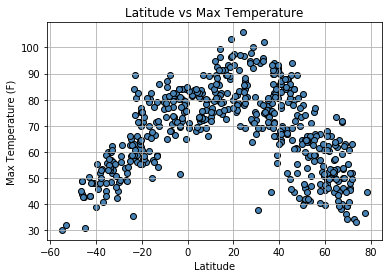

In [27]:
lat_vs_temp =plt.scatter(data['Latitude'], data['Max Temp (F)'], marker='o', facecolors='steelblue', edgecolors='black')
plt.title(f'Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

(0, 110)

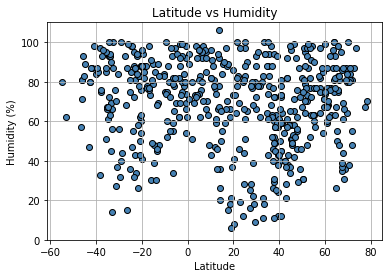

In [28]:
humidity_vs_latitude=plt.scatter(data['Latitude'], data['Humidity'], marker='o', facecolors='steelblue', edgecolors='black')
plt.title(f'Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.ylim(0, 110)

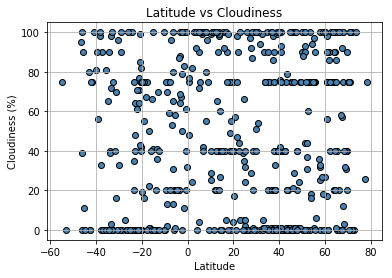

In [29]:
cloudiness_vs_latitude=plt.scatter(data['Latitude'], data['Cloudiness'], marker='o', facecolors='steelblue', edgecolors='black')
plt.title(f'Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

(0, 35)

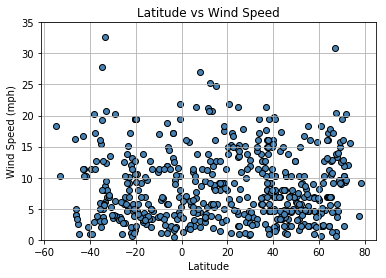

In [30]:
windspeed_vs_latitude=plt.scatter(data['Latitude'], data['Wind Speed (mph)'], marker='o', facecolors='steelblue', edgecolors='black')
plt.title(f'Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.ylim(0,35)